In [1]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!gdown 1Iy5lY4CfK_1yrBqzZALLvc-mwYJMbhy4
!gdown 1cFIzDH-EjRMNENgPmDU-RUZBMe4AFzhU
!gdown 1qtwJuEKrHXc0UtwwTS4ANzRP9qQvU3IY
!gdown 13h0d0UEbL85CsjHc8VlwZC8aGIG-8KVH


Downloading...
From: https://drive.google.com/uc?id=1Iy5lY4CfK_1yrBqzZALLvc-mwYJMbhy4
To: /content/Brinjol.zip
100% 625M/625M [00:03<00:00, 195MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cFIzDH-EjRMNENgPmDU-RUZBMe4AFzhU
To: /content/Bittergaurd.zip
100% 654M/654M [00:03<00:00, 205MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qtwJuEKrHXc0UtwwTS4ANzRP9qQvU3IY
To: /content/Red_Onion.zip
100% 458M/458M [00:02<00:00, 215MB/s]
Downloading...
From: https://drive.google.com/uc?id=13h0d0UEbL85CsjHc8VlwZC8aGIG-8KVH
To: /content/Beans.zip
100% 641M/641M [00:02<00:00, 242MB/s]


In [3]:
!unzip /content/Brinjol.zip
!unzip /content/Bittergaurd.zip
!unzip /content/Red_Onion.zip
!unzip /content/Beans.zip

Archive:  /content/Brinjol.zip
  inflating: Brinjol/20230318_162050_1_saved.jpg  
  inflating: Brinjol/20230318_162050_2_saved.jpg  
  inflating: Brinjol/20230318_162050_saved.jpg  
  inflating: Brinjol/20230318_162051_1_saved.jpg  
  inflating: Brinjol/20230318_162051_2_saved.jpg  
  inflating: Brinjol/20230318_162051_3_saved.jpg  
  inflating: Brinjol/20230318_162051_4_saved.jpg  
  inflating: Brinjol/20230318_162051_saved.jpg  
  inflating: Brinjol/20230318_162052_1_saved.jpg  
  inflating: Brinjol/20230318_162052_2_saved.jpg  
  inflating: Brinjol/20230318_162052_3_saved.jpg  
  inflating: Brinjol/20230318_162052_4_saved.jpg  
  inflating: Brinjol/20230318_162052_saved.jpg  
  inflating: Brinjol/20230318_162053_1_saved.jpg  
  inflating: Brinjol/20230318_162053_2_saved.jpg  
  inflating: Brinjol/20230318_162053_3_saved.jpg  
  inflating: Brinjol/20230318_162053_4_saved.jpg  
  inflating: Brinjol/20230318_162053_5_saved.jpg  
  inflating: Brinjol/20230318_162053_6_saved.jpg  
  infl

In [4]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
import os
import cv2
import requests
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [7]:
data = []
paths = []
result = []

def pre_process(position, path):
  paths = []
  for x, y, z in os.walk(path):
    for file in z: paths.append(os.path.join(x, file))
              
  for path in paths:
    try:
      img = Image.open(path)
      size=(224,224)
      img = img.resize(size)
      img = np.array(img)

      if (img.shape == (224, 224, 3)):
          data.append(np.array(img))
          result.append(encoder.transform([[position]]).toarray())
    except:
        try:
            os.remove(path)
            print("Removed problematic file:", path)
        except:
            print("Skipping: ". path)

In [ ]:
pre_process(0,'/content/Brinjol')
pre_process(1,'/content/Bittergaurd')
pre_process(2,'/content/Red_Onion')
pre_process(3,'/content/Beans')

Removed problematic file: /content/Brinjol/20230318_231109_2_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231108_1_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231109_3_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231106_3_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231106_2_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231108_5_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231107_1_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231109_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231105_1_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231104_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231107_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231106_1_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231108_4_saved.jpg
Removed problematic file: /content/Brinjol/20230318_231109_1_saved.jpg
Removed prob

In [9]:
data = np.array(data)
result = np.array(result)
result = result.reshape(data.shape[0],4)

In [10]:
print("Shape of data:", data.shape)
print("Shape of result:", result.shape)


Shape of data: (2502, 224, 224, 3)
Shape of result: (2502, 3)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [12]:
def createModel(inputShape=(224, 224, 3)):

    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), padding= 'same', activation= 'relu', input_shape= inputShape))
    model.add(Conv2D(64, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(128, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(128, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation= 'relu'))
    model.add(Dense(4096, activation= 'relu'))
    model.add(Dense(4, kernel_regularizer='l2',activation= 'softmax'))

    return model

In [13]:
from tensorflow.keras.optimizers import SGD

In [14]:
model = createModel()
model.compile(optimizer= SGD(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [15]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 16, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/10
126/126 [==============================] - 53s 295ms/step - loss: 1.1137 - accuracy: 0.4263 - val_loss: 1.2081 - val_accuracy: 0.3792
Epoch 2/10
126/126 [==============================] - 33s 265ms/step - loss: 1.0713 - accuracy: 0.4573 - val_loss: 1.0890 - val_accuracy: 0.3932
Epoch 3/10
126/126 [==============================] - 34s 267ms/step - loss: 0.9961 - accuracy: 0.5082 - val_loss: 1.1247 - val_accuracy: 0.4052
Epoch 4/10
126/126 [==============================] - 34s 273ms/step - loss: 0.8262 - accuracy: 0.6477 - val_loss: 1.1395 - val_accuracy: 0.3892
Epoch 5/10
126/126 [==============================] - 35s 274ms/step - loss: 0.9441 - accuracy: 0.5577 - val_loss: 1.0147 - val_accuracy: 0.4072
Epoch 6/10
126/126 [==============================] - 35s 277ms/step - loss: 0.6806 - accuracy: 0.7296 - val_loss: 0.3186 - val_accuracy: 0.9182
Epoch 7/10
126/126 [==============================] - 35s 278ms/step - loss: 0.4352 - accuracy: 0.8566 - val_loss: 0.3264 - val_ac

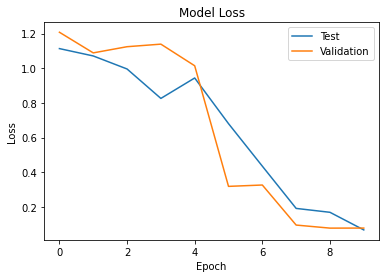

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

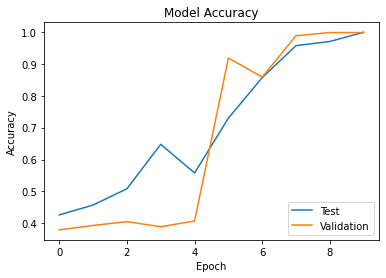

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

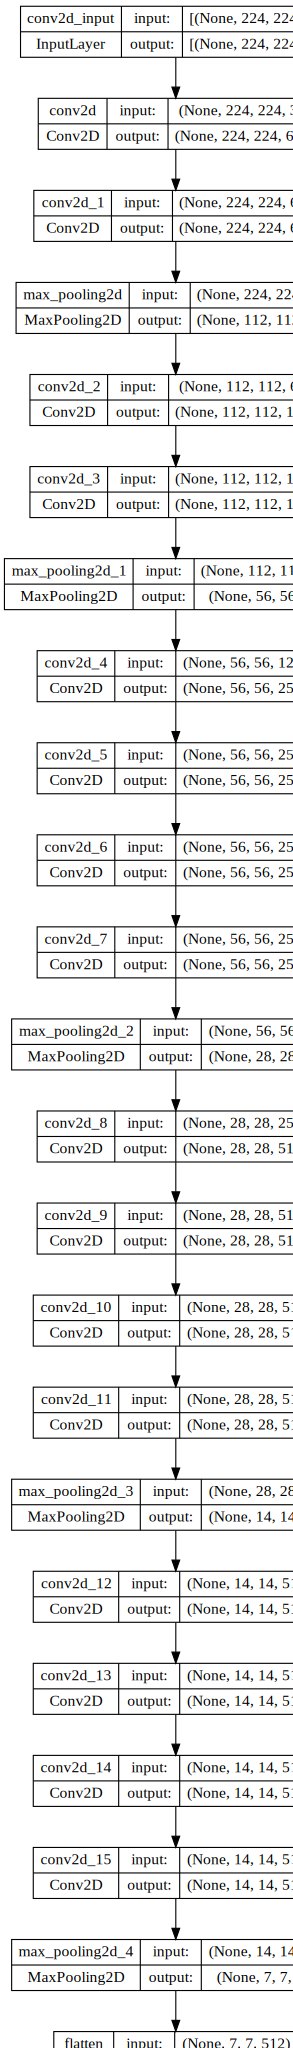

In [18]:
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
import pydot
import graphviz

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB',expand_nested=False, dpi=60, subgraph=False).create(prog='dot',format='svg'))

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0, 0.5, 'True Positive Rate')

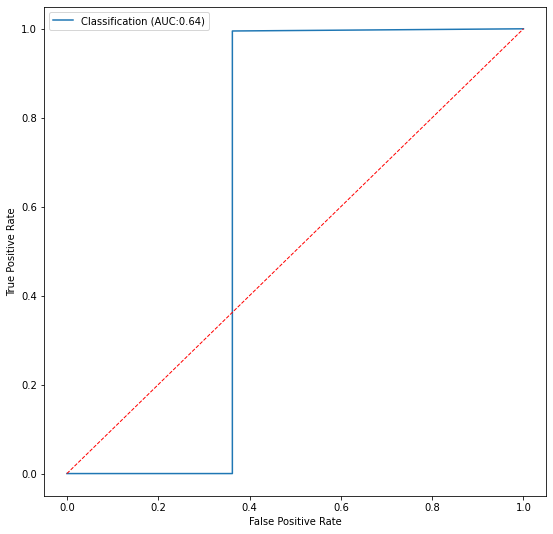

In [19]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score
from matplotlib.pyplot import figure

p_y = model.predict(x_test, verbose=False)
fpr, tpr, th = roc_curve(y_test.argmax(axis=1), p_y.argmax(axis=1), pos_label=1)
fig, c_ax = plt.subplots(1,1, figsize=(9, 9))
c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Classification', auc(fpr, tpr)))
c_ax.plot([0,1], [0,1], color='red', lw=1, linestyle='--')
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

In [21]:
model.save("/content/drive/MyDrive/model_vgg19_3seedData_classification_auc_64.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')